#### Analyzing and Predicting Outcomes on the Titanic Using EDA and Machine Learning

In [1]:
# Importing necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
# Loading the Titanic dataset and displaying first 5 rows of the dataset
df = sns.load_dataset('titanic')
df.head()


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


Several columns from the dataset appear to have similar or redundant information:  

* The "survived" and "alive" columns indicate whether the passenger survived. The survived column uses binary values (0 for no, 1 for yes), while the alive column uses text values

* The "pclass" and "class" columns describe the passenger class. The pclass column uses numerical values (1, 2, 3), while the class column uses textual values ("First", "Second", "Third")

* The "embarked" and "embark_town" columns both indicate the port where the passenger boarded. The embarked column uses abbreviations (C for Cherbourg, Q for Queenstown, S for Southampton), while the embark_town column uses the full names of the towns

* The sex and who columns are similar. The "sex" column categorizes passengers as "male" and "female", while the "who" column categorizes passengers as "man", "woman", or "child"

* The "adult_male" can be derived from sex and age

* The alone column can be related through a combination of sibsp and parch. If sibsp is 0 and parch is also 0, then the passenger is alone


Potential possible solutions include:  

* Drop redundant columns i.e alive, class, and embarked
* Similar columns??? feature selection, feature enginering or corelation analysis??

In [3]:
# Initial shape of Dataset
df.shape

(891, 15)

In [4]:
# Dropping redundant columns
df = df.drop(['alive', 'class', 'embarked'] , axis =1)

In [5]:
# Shape of Dataset after dropping redundant columns
df.shape

(891, 12)

The shape of our dataset indicates that there are 891 rows(observations) and 15 columns(features) in our dataset

In [6]:
# Displaying basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   who          891 non-null    object  
 8   adult_male   891 non-null    bool    
 9   deck         203 non-null    category
 10  embark_town  889 non-null    object  
 11  alone        891 non-null    bool    
dtypes: bool(2), category(1), float64(2), int64(4), object(3)
memory usage: 65.7+ KB


##### From the information on our dataframe:

1. There are missing values, particularly in the 'age', 'embarked', embark_town, and 'deck' columns.
2. All columns, except 'sex', 'who', embark_town and 'deck' are numerical (float64 or int64) in nature and suitable for machine learning 


##### Potential Preprocessing Steps:
1. Dealing with missing values either through imputation or deletion
2. Encode the non-numeric columns for model training.

In [7]:
# Checking for number of missing values
df.isna().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
who              0
adult_male       0
deck           688
embark_town      2
alone            0
dtype: int64

In [8]:
# Finding proportions of missing values
for i in df.columns[df.isnull().any()]:
    missing_val = round((df[i].isnull().sum()/len(df)) *100, 2)
    print(f'{missing_val} % of the values in column {i.title()} are missing')

19.87 % of the values in column Age are missing
77.22 % of the values in column Deck are missing
0.22 % of the values in column Embark_Town are missing


##### Dealing with Missing values
1.  Since Age, Embarked, Embark_town are missing less than 20% of their data. Data imputation will be applied
2.  77.2% of the values in the deck column are missing therefore this column will be dropped

In [9]:
# Imputing missing values for age
df['age'] = df['age'].fillna(df['age'].median())

# Imputing missing values for embark town
df['embark_town'] = df['embark_town'].fillna(df['embark_town'].mode()[0])

# Dropping column deck with too many missing values
df = df.drop(columns=['deck'])


In [10]:
# Checking dataset info after dealing with missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          891 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   who          891 non-null    object 
 8   adult_male   891 non-null    bool   
 9   embark_town  891 non-null    object 
 10  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(3)
memory usage: 64.5+ KB


In [11]:
# Displaying descriptive statistics of numerical columns of Dataset
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [12]:
# Displaying descriptive statistics of non-numerical columns of Dataset
df.describe(include = ['object', 'bool', 'category'])

,sex,who,adult_male,embark_town,alone
count,891,891,891,891,891
unique,2,3,2,3,2
top,male,man,True,Southampton,True
freq,577,537,537,646,537


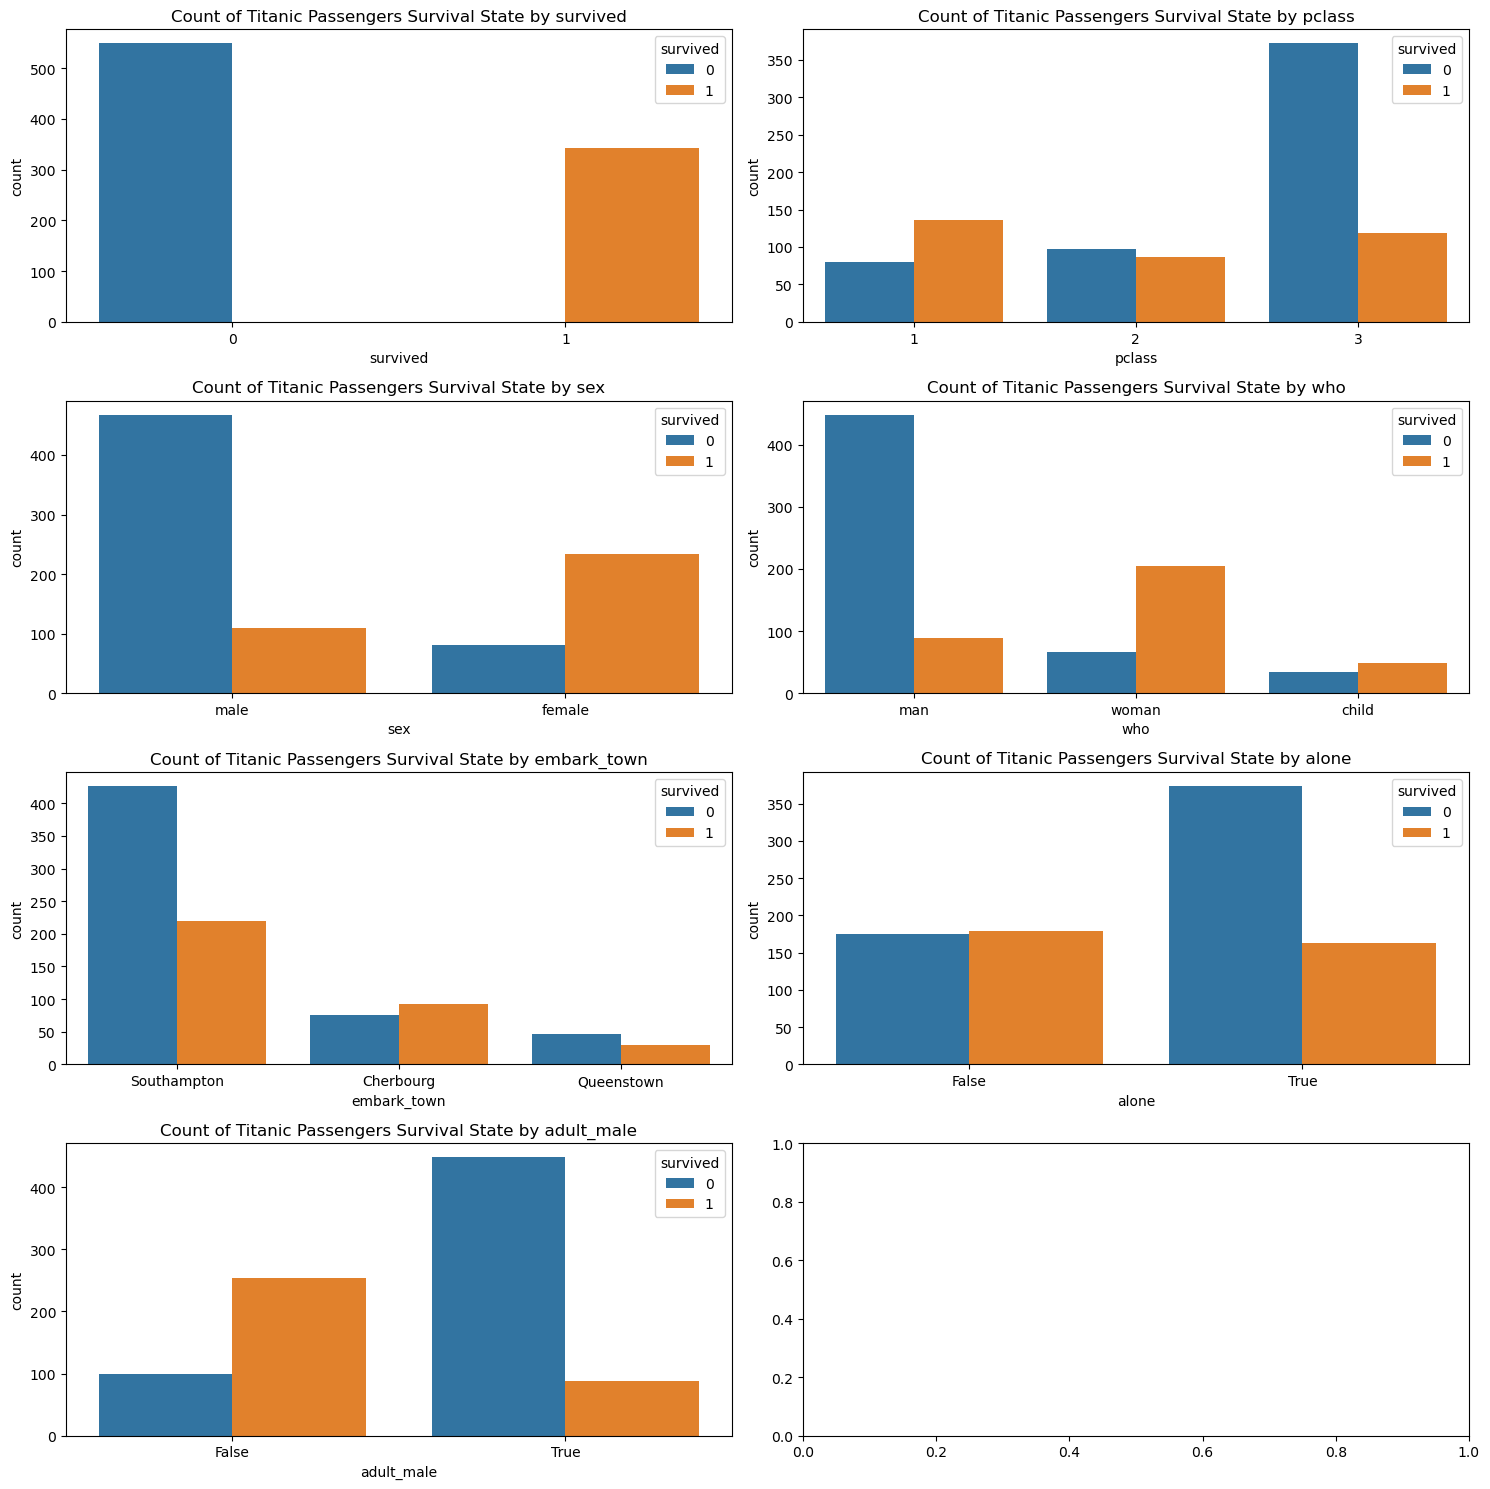

In [13]:
# Setting up a 2x2 grid of plots
fig, axes = plt.subplots(4,2, figsize=(15, 15))
axes = axes.flatten()
cols = ['survived', 'pclass', 'sex', 'who', 'embark_town','alone', 'adult_male']

# Plotting a visual in each subplot
for i, col in enumerate(cols):
        sns.countplot(x= col, data=df, hue = 'survived', ax = axes[i])
        axes[i].set_title(f'Count of Titanic Passengers Survival State by {col}')
        axes[i].set_xlabel(col)

plt.tight_layout()
plt.show()

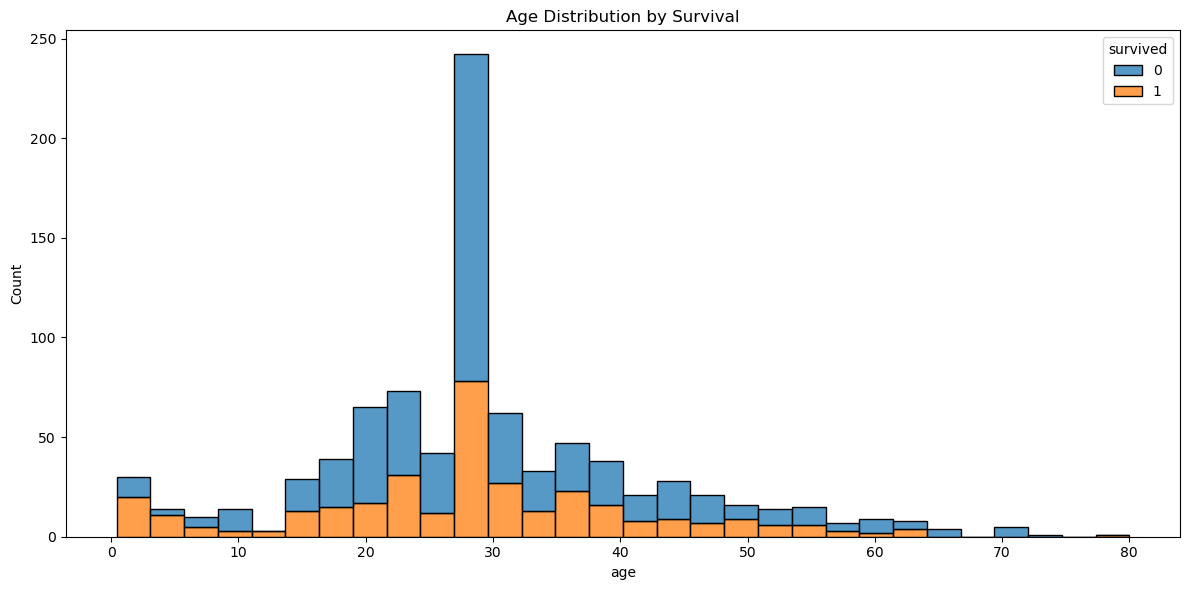

In [14]:
import warnings

# Suppress all warnings
warnings.filterwarnings("ignore")


# Visualizing survival count of titanic passengers by Age distribution
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='age', hue='survived', multiple='stack')
plt.title('Age Distribution by Survival')

plt.tight_layout()
plt.show()

##### Insights from Countplots and histplot:

1. More passengers did not survive (0) as compared to those who survived (1).
2. Survival rates vary significantly by passenger class, with higher survival rates occurring in higher classes.
3. Females have a higher survival rate compared to males.
4. More men died as compared to women and children
5. Survival rate was highest for passengers embarking in Southampton
6. Passengers who boarded alone had a lower chance of surviving the crash
7. Age distribution shows that younger passengers had higher survival rates

##### Correlation and Heatmap Analysis

In [15]:
corr = df.corr(numeric_only= True)['survived']
corr

survived      1.000000
pclass       -0.338481
age          -0.064910
sibsp        -0.035322
parch         0.081629
fare          0.257307
adult_male   -0.557080
alone        -0.203367
Name: survived, dtype: float64

<Axes: >

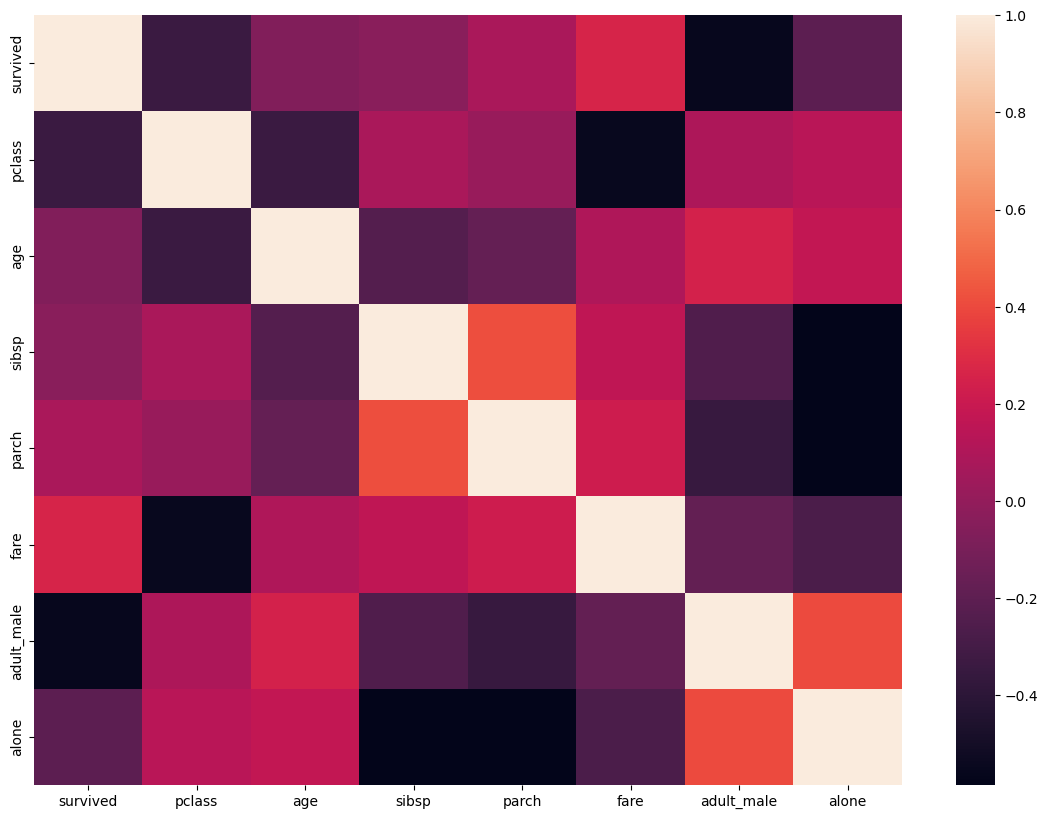

In [16]:
plt.figure(figsize=(14,10))
sns.heatmap(df.corr(numeric_only= True))

#### Building the Model

In [17]:
# Creating a new feature for family size
df['family_size'] = df['sibsp'] + df['parch'] + 1

# Encoding categorical variables
df = pd.get_dummies(df, columns=['sex', 'embark_town', 'who', 'adult_male', 'alone'], drop_first=True)

# View data 
df.head()


,survived,pclass,age,sibsp,parch,fare,family_size,sex_male,embark_town_Queenstown,embark_town_Southampton,who_man,who_woman,adult_male_True,alone_True
0,0,3,22.0,1,0,7.2500,2,True,False,True,True,False,True,False
1,1,1,38.0,1,0,71.2833,2,False,False,False,False,True,False,False
2,1,3,26.0,0,0,7.9250,1,False,False,True,False,True,False,True
3,1,1,35.0,1,0,53.1000,2,False,False,True,False,True,False,False
4,0,3,35.0,0,0,8.0500,1,True,False,True,True,False,True,True


In [18]:
from sklearn.model_selection import train_test_split

# Define feature set and target variable
X = df.drop('survived', axis = 1)
y = df['survived']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


 ##### Training the Models

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Initialize and train the model
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print()
print('*' * 15)
print("Confusion Matrix:")
print(conf_matrix)
print()
print('*' * 15)
print("Classification Report:")
print(class_report)



Accuracy: 0.8156424581005587

***************
Confusion Matrix:
[[91 14]
 [19 55]]

***************
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.87      0.85       105
           1       0.80      0.74      0.77        74

    accuracy                           0.82       179
   macro avg       0.81      0.80      0.81       179
weighted avg       0.81      0.82      0.81       179



In [20]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Initialize and train the model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Predict on the test set
dt_y_pred = dt_model.predict(X_test)

# Evaluate the model
dt_accuracy = accuracy_score(y_test, dt_y_pred)
dt_conf_matrix = confusion_matrix(y_test, dt_y_pred)
dt_class_report = classification_report(y_test, dt_y_pred)

print(f"Decision Tree Accuracy: {dt_accuracy}")
print()
print('*' * 15)
print("Decision Tree Confusion Matrix:")
print(dt_conf_matrix)
print()
print('*' * 15)
print("Decision Tree Classification Report:")
print(dt_class_report)


Decision Tree Accuracy: 0.7653631284916201

***************
Decision Tree Confusion Matrix:
[[82 23]
 [19 55]]

***************
Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.78      0.80       105
           1       0.71      0.74      0.72        74

    accuracy                           0.77       179
   macro avg       0.76      0.76      0.76       179
weighted avg       0.77      0.77      0.77       179



In [21]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train the model
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)
rf_model.fit(X_train, y_train)

# Predict on the test set
rf_y_pred = rf_model.predict(X_test)

# Evaluate the model
rf_accuracy = accuracy_score(y_test, rf_y_pred)
rf_conf_matrix = confusion_matrix(y_test, rf_y_pred)
rf_class_report = classification_report(y_test, rf_y_pred)

print(f"Random Forest Accuracy: {rf_accuracy}")
print()
print('*' * 15)
print("Random Forest Confusion Matrix:")
print(rf_conf_matrix)
print()
print('*' * 15)
print("Random Forest Classification Report:")
print(rf_class_report)


Random Forest Accuracy: 0.8212290502793296

***************
Random Forest Confusion Matrix:
[[90 15]
 [17 57]]

***************
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.86      0.85       105
           1       0.79      0.77      0.78        74

    accuracy                           0.82       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179



In [22]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialize and train the model
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)

# Predict on the test set
gb_y_pred = gb_model.predict(X_test)

# Evaluate the model
gb_accuracy = accuracy_score(y_test, gb_y_pred)
gb_conf_matrix = confusion_matrix(y_test, gb_y_pred)
gb_class_report = classification_report(y_test, gb_y_pred)

print(f"Gradient Boosting Accuracy: {gb_accuracy}")
print()
print('*' * 15)
print("Gradient Boosting Confusion Matrix:")
print(gb_conf_matrix)
print()
print('*' * 15)
print("Gradient Boosting Classification Report:")
print(gb_class_report)


Gradient Boosting Accuracy: 0.8212290502793296

***************
Gradient Boosting Confusion Matrix:
[[93 12]
 [20 54]]

***************
Gradient Boosting Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.89      0.85       105
           1       0.82      0.73      0.77        74

    accuracy                           0.82       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179



In [23]:
from sklearn.svm import SVC

# Initialize and train the model
svm_model = SVC(random_state=42)
svm_model.fit(X_train, y_train)

# Predict on the test set
svm_y_pred = svm_model.predict(X_test)

# Evaluate the model
svm_accuracy = accuracy_score(y_test, svm_y_pred)
svm_conf_matrix = confusion_matrix(y_test, svm_y_pred)
svm_class_report = classification_report(y_test, svm_y_pred)

print(f"SVM Accuracy: {svm_accuracy}")
print()
print('*' * 15)
print("SVM Confusion Matrix:")
print(svm_conf_matrix)
print()
print('*' * 15)
print("SVM Classification Report:")
print(svm_class_report)


SVM Accuracy: 0.659217877094972

***************
SVM Confusion Matrix:
[[99  6]
 [55 19]]

***************
SVM Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.94      0.76       105
           1       0.76      0.26      0.38        74

    accuracy                           0.66       179
   macro avg       0.70      0.60      0.57       179
weighted avg       0.69      0.66      0.61       179



In [24]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize and train the model
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

# Predict on the test set
knn_y_pred = knn_model.predict(X_test)

# Evaluate the model
knn_accuracy = accuracy_score(y_test, knn_y_pred)
knn_conf_matrix = confusion_matrix(y_test, knn_y_pred)
knn_class_report = classification_report(y_test, knn_y_pred)

print(f"KNN Accuracy: {knn_accuracy}")
print()
print('*' * 15)
print("KNN Confusion Matrix:")
print(knn_conf_matrix)
print()
print('*' * 15)
print("KNN Classification Report:")
print(knn_class_report)


KNN Accuracy: 0.7262569832402235

***************
KNN Confusion Matrix:
[[91 14]
 [35 39]]

***************
KNN Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.87      0.79       105
           1       0.74      0.53      0.61        74

    accuracy                           0.73       179
   macro avg       0.73      0.70      0.70       179
weighted avg       0.73      0.73      0.72       179



In [25]:
from sklearn.naive_bayes import GaussianNB

# Initialize and train the model
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Predict on the test set
nb_y_pred = nb_model.predict(X_test)

# Evaluate the model
nb_accuracy = accuracy_score(y_test, nb_y_pred)
nb_conf_matrix = confusion_matrix(y_test, nb_y_pred)
nb_class_report = classification_report(y_test, nb_y_pred)

print(f"Naive Bayes Accuracy: {nb_accuracy}")
print()
print('*' * 15)
print("Naive Bayes Confusion Matrix:")
print(nb_conf_matrix)
print()
print('*' * 15)
print("Naive Bayes Classification Report:")
print(nb_class_report)


Naive Bayes Accuracy: 0.7932960893854749

***************
Naive Bayes Confusion Matrix:
[[87 18]
 [19 55]]

***************
Naive Bayes Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.83      0.82       105
           1       0.75      0.74      0.75        74

    accuracy                           0.79       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.79      0.79      0.79       179



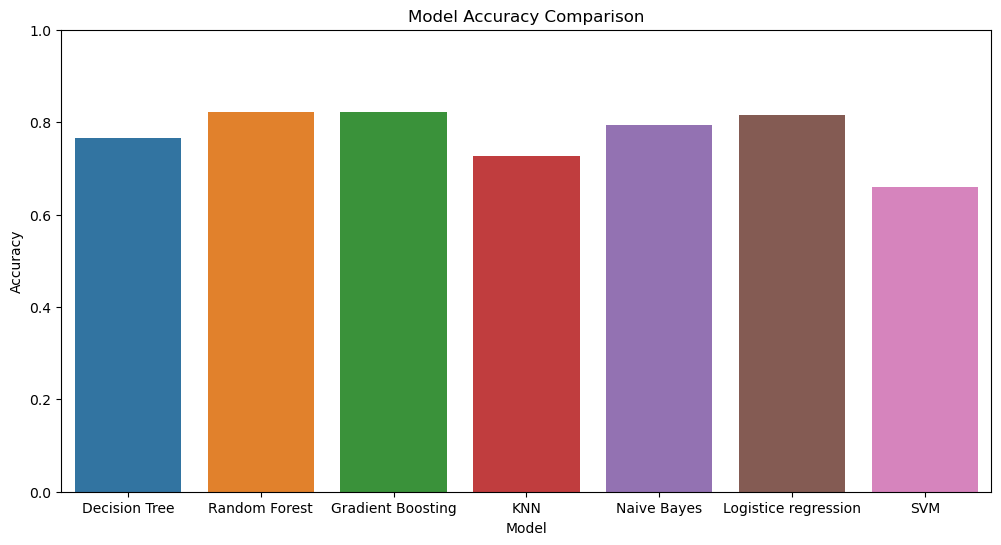

In [26]:
# Accuracy scores
accuracies = {
    'Decision Tree': dt_accuracy,
    'Random Forest': rf_accuracy,
    'Gradient Boosting': gb_accuracy,
    'KNN': knn_accuracy,
    'Naive Bayes': nb_accuracy,
    'Logistice regression': accuracy,
    'SVM': svm_accuracy
}

# Plotting accuracies
plt.figure(figsize=(12, 6))
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()))
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.xlabel('Model')
plt.ylim(0.0, 1.0)
plt.show()
